In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

# Table of Contents
>## 1. Strong (Naive) Independence Assumption

>## 2. NBC based on
* 2.1. Gaussian Normal Likelihood
* 2.2. Bernoulli Likelihood
* 2.3. Multinomial Likelihood

>## 3. NBC in Scikit-Learn
* 3.1. `GaussianNB`
* 3.2. `BernoulliNB`
* 3.3. `Multinomial`

>## 4. Example - Newsgroups Data

>## 5. Sentimal Analysis with NBC

# 1. Strong (Naive) Independence Assumption
* Multi-dim $x = (x_1, \ldots, x_D)$ $\rightarrow$ **difficult to calculate the joint probability** $P(x_1, \ldots, x_D \mid y = C_k)$
* Thus, assume that the features are **conditionally independent**
* **Naive Assumption + Bayes Classifiers = NBC**

>$$ P(x_1, \ldots, x_D \mid y = C_k) = \prod_{d=1}^D P(x_d \mid y = C_k) $$
>
>$$ P(y = C_k \mid x) \;\; \propto \;\; \prod_{d=1}^D P(x_{d} \mid y = C_k)\; P(y = C_k) $$

# 2. NBC based on
## 2.1. Gaussian Normal Likelihood
* All elements of $x$ are **real** AND **appear around some values for each class** $\rightarrow$ Use Gaussian Normal

>$$ P(x_d \mid y = C_k) = \dfrac{1}{\sqrt{2\pi\sigma_{d,k}^2}} \exp \left(-\dfrac{(x_d-\mu_{d,k})^2}{2\sigma_{d,k}^2}\right) $$



## 2.2. Bernoulli Likelihood
* Elements of $x = (x_1,\ldots, x_D)$ can have **0 or 1** $\rightarrow$ **Set of coins**
* $\theta$ is **feature dependent** $\rightarrow$ $D$ variety
* $\theta$ is **class dependent** $\rightarrow$ $K$ variety ($y=C_k(k=1,...,K)$)
* There are **$K$ sets of $D$ coins**

>$$ P(x_d \mid y = C_k) = \theta_{d,k}^{x_d} (1-\theta_{d,k})^{(1-x_d)} $$

* To sum up, 
* Toss $D$ coins for $N$ times $\rightarrow$ guess which of $K$ sets it was

## 2.3. Multinomial Likelihood
* $x=(x_1,...,x_D) \rightarrow$ **D-sided Dice**
* There are $K$ dices with $D$ sides

>$$ P(x_1, \ldots, x_D \mid y = C_k) \;\; \propto \;\; \prod_{d=1}^D \theta_{d,k}^{x_{d,k}} $$
>
>$$ N_k = \sum_{d=1}^{D} x_{d,k} $$
>
>$$ \sum_{d=1}^{D} \theta_{d,k} = 1 $$

* To sum up,
* Toss a $D$-sided dice for $N$ times $\rightarrow$ guess which of $K$ dices it was

# 3. NBC in `Scikit-Learn`
* [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
* [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
* **These classes have:**
  * **Prior-related**:

>* `classes_`: **classes of $y$**
>* `class_count_` **no. of samples for each class**
>* `class_prior_` **$P(Y)$** (GaussianNB)
>* `class_log_prior_` **$\log P(Y)$** (BernoulliNB & MultinomialNB)

  * **Likelihood-related:**

>* `theta_ `, `sigma_`: $\mu$ & $\sigma^2$ (GaussianNB)
>* `feature_count_`: $N_{d,k}$ matrix (BernoulliNB OR MultinomialNB)
>* `feature_log_prob_ `: Log Parameter vector (BernoulliNB OR MultinomialNB)
>$$ \log \theta_k = (\log \theta_{1,k}, \ldots, \log \theta_{D, k}) = \left( \log \dfrac{N_{1,k}}{N_k}, \ldots, \log \dfrac{N_{D,k}}{N_k} \right)$$

  * **Smoothing** (**Laplace Smoothing OR Add-One Smoothing)

>* `alpha`: decides the strenght of smoothing
>* **BernoulliNB**:
>$$ \hat{\theta}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + 2 \alpha} $$ 
>* **MultinomialNB**:
>$$ \hat{\theta}_{d,k} = \frac{ N_{d,k} + \alpha}{N_k + D \alpha} $$ 

## 3.1. `GaussianNB`

### Step 1. Prepare data - two features($x_1, x_2$) & two classes($y = 0, 1$)

$$ 
\mu_0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix},
\;\; 
\Sigma_0 = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 2 \end{bmatrix} 
$$
$$ 
\mu_1 = \begin{bmatrix} 2 \\ 2 \end{bmatrix},
\;\; 
\Sigma_1 = \begin{bmatrix} 1.2 & -0.8 \\ -0.8 & 2 \end{bmatrix} 
$$

In [3]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

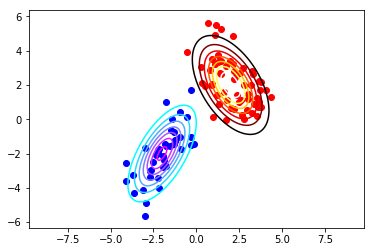

In [4]:
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

### Step 2. Use `GaussianNB`

In [5]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

### Step 3. Prior-related parameters

In [6]:
model_norm.classes_

array([0., 1.])

In [7]:
model_norm.class_count_

array([40., 60.])

In [8]:
model_norm.class_prior_

array([0.4, 0.6])

### Step 4. Parameters of the model (for each class)

In [9]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [10]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

### Step 5. Compare data & prediction through visualization

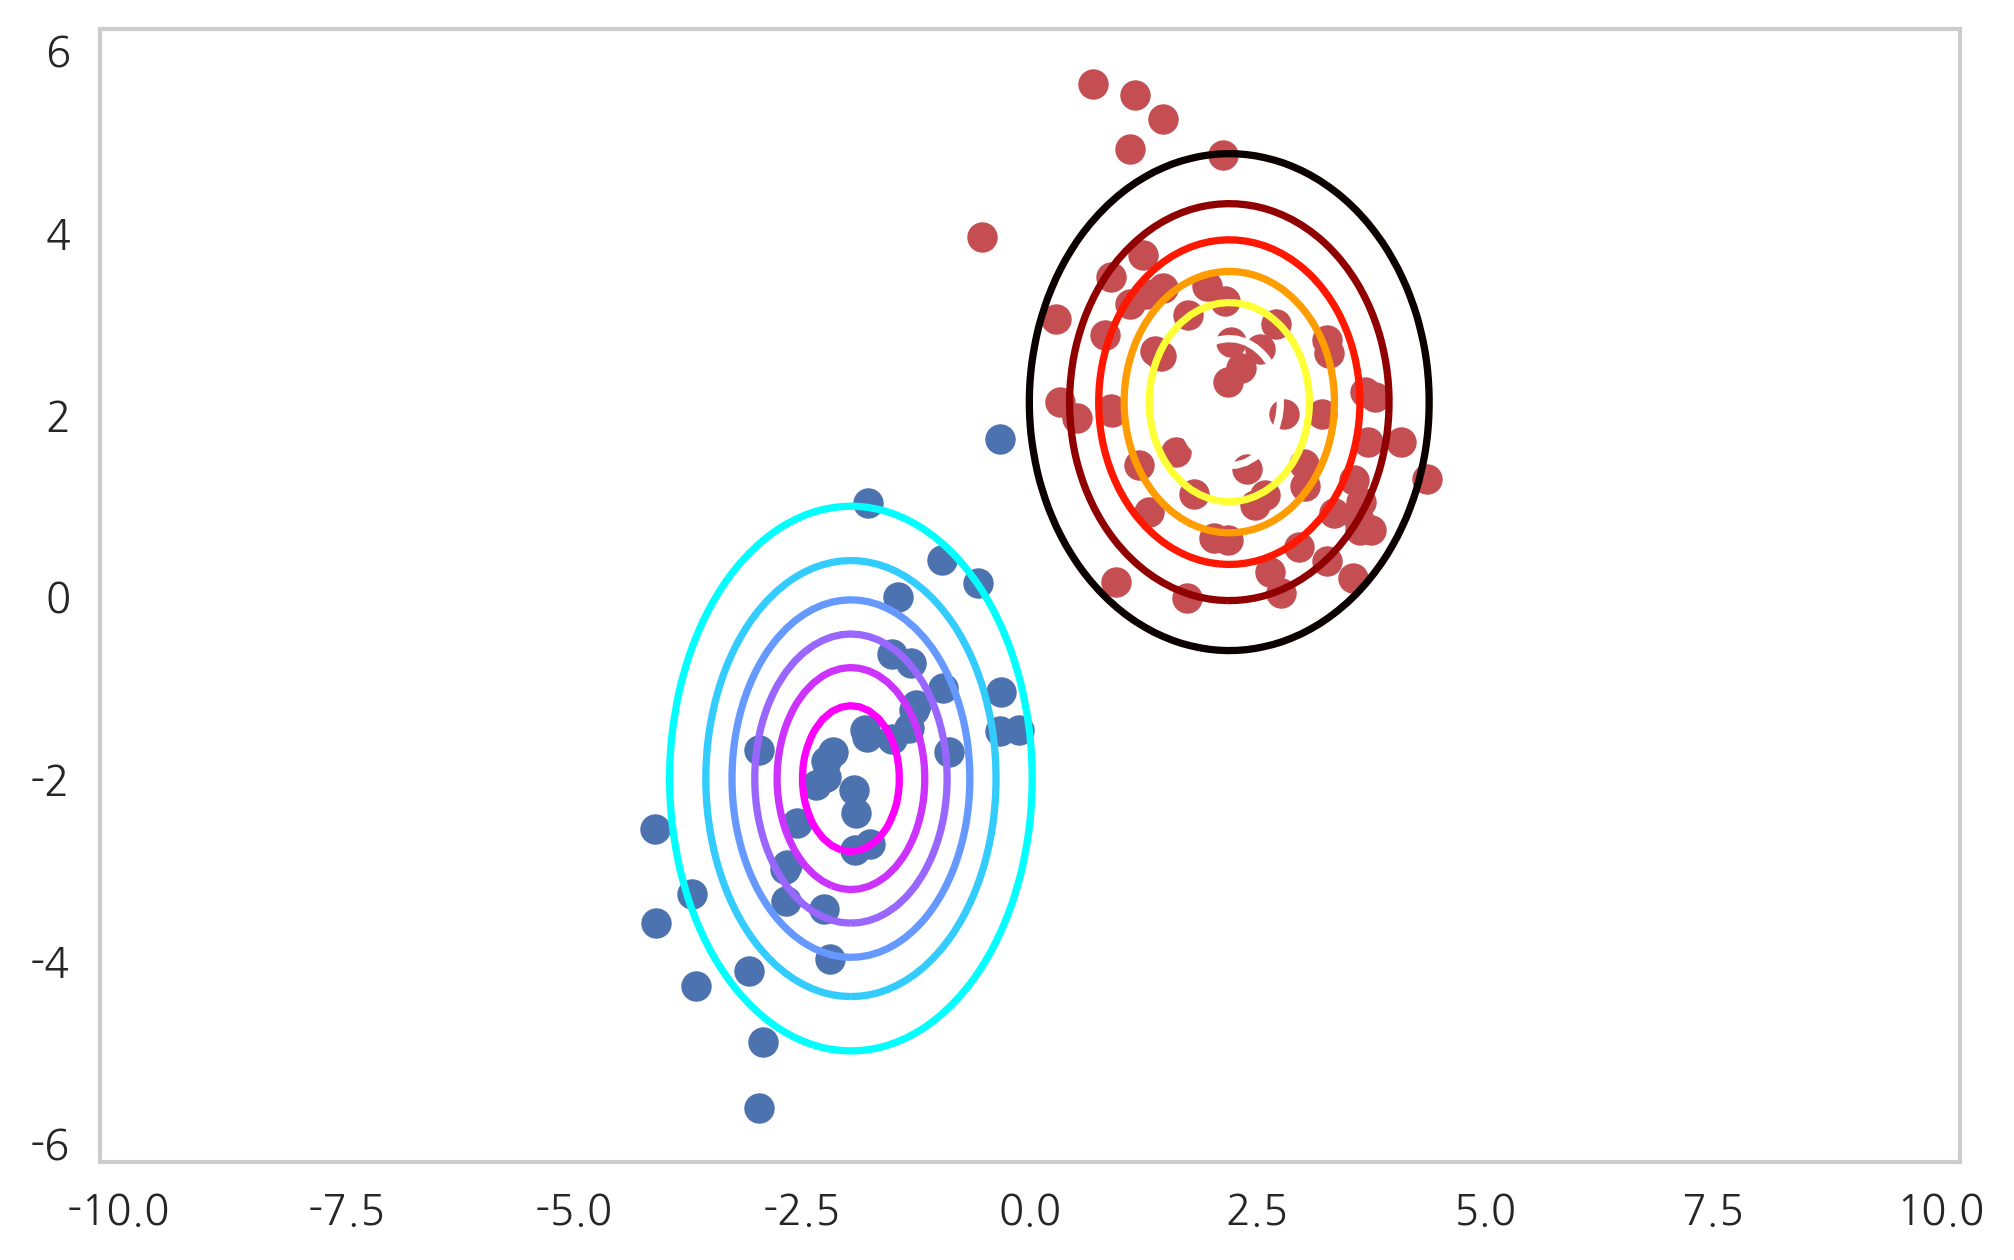

In [9]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

### Step 6. Use `predict_proba` to determine probability for each class

In [11]:
x_new = [-0.7, -0.8]
model_norm.predict_proba([x_new])

array([[0.98300323, 0.01699677]])

### Step 6-1. How they were calculated

In [12]:
likelihood = [
    sp.stats.norm(model_norm.theta_[0], np.sqrt(model_norm.sigma_[0])).pdf(x_new).prod(),
    sp.stats.norm(model_norm.theta_[1], np.sqrt(model_norm.sigma_[1])).pdf(x_new).prod()]
likelihood

[0.0346968402917242, 0.0003999540815189114]

In [13]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.01387874, 0.00023997])

In [14]:
posterior / posterior.sum()

array([0.98300323, 0.01699677])

## 3.2. `BernoulliNB`

### Step 1. Prepare data - determine spam mail using 4 keywords (BOW encoding - yes or no)

In [15]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

### Step 2. Use `BernoulliNB`

In [16]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

### Step 3. Prior-related parameters

In [17]:
model_bern.classes_

array([0, 1])

In [18]:
model_bern.class_count_

array([4., 6.])

In [19]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

### Step 4. Parameters of the model (for each $k$ and $d$)

In [20]:
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [21]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

### Step 4-1. Parameters of the model (with smoothing)

In [22]:
model_bern.alpha

1.0

In [23]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

### Step 5. Use `predict_proba` to determine probability for each class

In [24]:
x_new = np.array([1, 1, 0, 0])

In [25]:
model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

### Step 5-1. How they were calculated

In [26]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1)\
    * np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.72480181, 0.27519819])

## 3.3. `MultinomialNB`

### Step 1. Prepare data - determine spam mail using 4 keywords (BOW encoding - no. of appearance)

In [28]:
X = np.array([    
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

### Step 2. Use `MultinomialNB`

In [29]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

### Step 3. Prior-related parameters

In [30]:
model_mult.classes_

array([0, 1])

In [31]:
model_mult.class_count_

array([4., 6.])

In [32]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

### Step 4. Parameters of the model (for each $k$ and $d$)

In [33]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [34]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

### Step 4-1. Parameters of the model (with smoothing)

In [35]:
model_mult.alpha

1.0

In [36]:
(fc + model_mult.alpha) / \
(np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + model_mult.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [37]:
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

### Step 5. Use `predict_proba` to determine probability for each class

In [38]:
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

### Step 5-1. How they were calculated

In [39]:
p = (theta ** x_new).prod(axis=1)*np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.38848858, 0.61151142])

# 4. Example - Newsgroups Data

In [40]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('model', MultinomialNB()),
         ])
model2 = Pipeline([
            ('vect', TfidfVectorizer()),
            ('model', MultinomialNB()),
         ])
model3 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english")),
            ('model', MultinomialNB()),
         ])
model4 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('model', MultinomialNB()),
         ])

In [42]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i, np.mean(scores)))

Model0: Mean score: 0.855
Model1: Mean score: 0.856
Model2: Mean score: 0.883
Model3: Mean score: 0.888
CPU times: user 1min 18s, sys: 3.04 s, total: 1min 21s
Wall time: 1min 21s


# 5. Sentimal Analysis with NBC
* We will import movie reviews & determine if it is **positive** or **negative**
* Data available at https://github.com/e9t/nsmc

### Step 1. Data Preprocessing

In [43]:
%%time
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

/bin/sh: wget: command not found
/bin/sh: wget: command not found
CPU times: user 6.68 ms, sys: 24.1 ms, total: 30.8 ms
Wall time: 245 ms


### Step 2. Unicode Encoding using `codecs`

In [44]:
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]   # header 제외

FileNotFoundError: [Errno 2] No such file or directory: 'ratings_train.txt'

### Step 3. Each data consist of ID, Review, Rating $\rightarrow$ Save Review as `X`, and rating as `y`

In [3]:
from pprint import pprint
pprint(data[0])

['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']


In [4]:
X = list(zip(*data))[1]
y = np.array(list(zip(*data))[2], dtype=int)

### Step 4. Use `MultinomialNB` to train the model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

model1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('mb', MultinomialNB()),
        ])

In [6]:
%%time 
model1.fit(X, y)

CPU times: user 4.67 s, sys: 130 ms, total: 4.8 s
Wall time: 4.8 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('mb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Step 5. Import test data to test the performance

In [7]:
import codecs
with codecs.open("ratings_test.txt", encoding='utf-8') as f:
    data_test = [line.split('\t') for line in f.read().splitlines()]
    data_test = data_test[1:]   # exclude header

In [8]:
X_test = list(zip(*data_test))[1]
y_test = np.array(list(zip(*data_test))[2], dtype=int)

print(classification_report(y_test, model1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.84      0.83     24827
          1       0.84      0.81      0.82     25173

avg / total       0.83      0.83      0.83     50000



### Step 6. Compare this result with `TfidVectorizer`

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

model2 = Pipeline([
            ('vect', TfidfVectorizer()), 
            ('mb', MultinomialNB()),
        ])

In [10]:
%%time 
model2.fit(X, y)

CPU times: user 4.82 s, sys: 40 ms, total: 4.86 s
Wall time: 4.86 s


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...True,
        vocabulary=None)), ('mb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [11]:
print(classification_report(y_test, model2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.84      0.83     24827
          1       0.84      0.81      0.83     25173

avg / total       0.83      0.83      0.83     50000



### Step 7. Compare this result with `KoNLPy`

In [12]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

def tokenize_pos(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [13]:
model3 = Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize_pos)), 
            ('mb', MultinomialNB()),
        ])

In [14]:
%%time 
model3.fit(X, y)

CPU times: user 3min 51s, sys: 1.67 s, total: 3min 52s
Wall time: 3min 44s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...f28>,
        vocabulary=None)), ('mb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [15]:
print(classification_report(y_test, model3.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.85      0.84     24827
          1       0.85      0.83      0.84     25173

avg / total       0.84      0.84      0.84     50000



### Step 8. Improve performance using `(1,2)-gram`

In [16]:
model4 = Pipeline([
            ('vect', TfidfVectorizer(tokenizer=tokenize_pos, ngram_range=(1,2))), 
            ('mb', MultinomialNB()),
        ])

In [17]:
%%time 
model4.fit(X, y)

CPU times: user 4min 45s, sys: 1.49 s, total: 4min 46s
Wall time: 4min 46s


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
  ...True,
        vocabulary=None)), ('mb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [18]:
print(classification_report(y_test, model4.predict(X_test)))

             precision    recall  f1-score   support

          0       0.86      0.87      0.87     24827
          1       0.87      0.86      0.87     25173

avg / total       0.87      0.87      0.87     50000

